In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
df = pd.read_csv('weather.csv')
df.head()

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [29]:
df.shape

(52696, 22)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  52696 non-null  object 
 1   p (mbar)              52696 non-null  float64
 2   T (degC)              52696 non-null  float64
 3   Tpot (K)              52696 non-null  float64
 4   Tdew (degC)           52696 non-null  float64
 5   rh (%)                52696 non-null  float64
 6   VPmax (mbar)          52696 non-null  float64
 7   VPact (mbar)          52696 non-null  float64
 8   VPdef (mbar)          52696 non-null  float64
 9   sh (g/kg)             52696 non-null  float64
 10  H2OC (mmol/mol)       52696 non-null  float64
 11  rho (g/m**3)          52696 non-null  float64
 12  wv (m/s)              52696 non-null  float64
 13  max. wv (m/s)         52696 non-null  float64
 14  wd (deg)              52696 non-null  float64
 15  rain (mm)          

In [31]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,...,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,...,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206,417.798615
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,...,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620,321.570015
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,...,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000,-9999.000000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,...,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,415.500000
50%,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,...,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000,423.200000
75%,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,...,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500,437.100000
max,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,...,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000,524.200000


In [32]:
df.isnull().sum()

date                    0
p (mbar)                0
T (degC)                0
Tpot (K)                0
Tdew (degC)             0
rh (%)                  0
VPmax (mbar)            0
VPact (mbar)            0
VPdef (mbar)            0
sh (g/kg)               0
H2OC (mmol/mol)         0
rho (g/m**3)            0
wv (m/s)                0
max. wv (m/s)           0
wd (deg)                0
rain (mm)               0
raining (s)             0
SWDR (W/m�)             0
PAR (�mol/m�/s)         0
max. PAR (�mol/m�/s)    0
Tlog (degC)             0
OT                      0
dtype: int64

In [33]:
data = df['T (degC)'].values.reshape(-1, 1)

print(f"Loaded {len(data)} data points for 'T (degC)'.")

Loaded 52696 data points for 'T (degC)'.


In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [35]:
training_size = int(len(data) * 0.8)
train_data = data[0:training_size, :]
test_data = data[training_size:len(data), :]

In [36]:
scaler.fit(train_data)



,feature_range,"(0, ...)"
,copy,True
,clip,False


In [37]:
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)


In [38]:
def create_sequences(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        # Get 'time_step' elements as features (X)
        a = dataset[i:(i + time_step), 0] 
        dataX.append(a)
        # Get the next element as the label (y)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
time_step = 60 

X_train, y_train = create_sequences(train_scaled, time_step)
X_test, y_test = create_sequences(test_scaled, time_step)


In [40]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"X_train shape (samples, timesteps, features): {X_train.shape}")
print(f"X_test shape (samples, timesteps, features):  {X_test.shape}")
print(f"y_train shape (samples): {y_train.shape}")
print(f"y_test shape (samples):  {y_test.shape}")

X_train shape (samples, timesteps, features): (42096, 60, 1)
X_test shape (samples, timesteps, features):  (10480, 60, 1)
y_train shape (samples): (42096,)
y_test shape (samples):  (10480,)


In [41]:
model = Sequential()
model.add(LSTM(
    units=50, 
    return_sequences=True, 
    input_shape=(time_step, 1) 
))
model.add(LSTM(
    units=50, 
    return_sequences=False 
))
model.add(Dense(units=25, activation='relu')) 
model.add(Dense(units=1))

c:\Users\ruthr\anaconda3\envs\torch_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - loss: 0.0018 - val_loss: 2.3581e-04
Epoch 2/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - loss: 2.2076e-04 - val_loss: 9.1630e-05
Epoch 3/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - loss: 1.5774e-04 - val_loss: 7.0005e-05
Epoch 4/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 1.0829e-04 - val_loss: 6.1131e-05
Epoch 5/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - loss: 7.7493e-05 - val_loss: 3.1096e-05
Epoch 6/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - loss: 6.0341e-05 - val_loss: 2.3632e-05
Epoch 7/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - loss: 5.1594e-05 - val_loss: 2.6583e-05
Epoch 8/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - loss: 5.1966e-05 - val_loss: 3.3731e-05
Epoch 9/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - loss: 4.2515e-05 - val_loss: 1.6511e-05
Epoch 10/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - loss: 3.7077e-05 - val_loss: 3.4556e-05


In [44]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1316/1316 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [45]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [46]:
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

In [47]:
train_rmse = math.sqrt(mean_squared_error(y_train_orig, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_orig, test_predict))

print(f"\nTraining RMSE: {train_rmse:.2f} degC")
print(f"Testing RMSE:  {test_rmse:.2f} degC")


Training RMSE: 0.35 degC
Testing RMSE:  0.24 degC


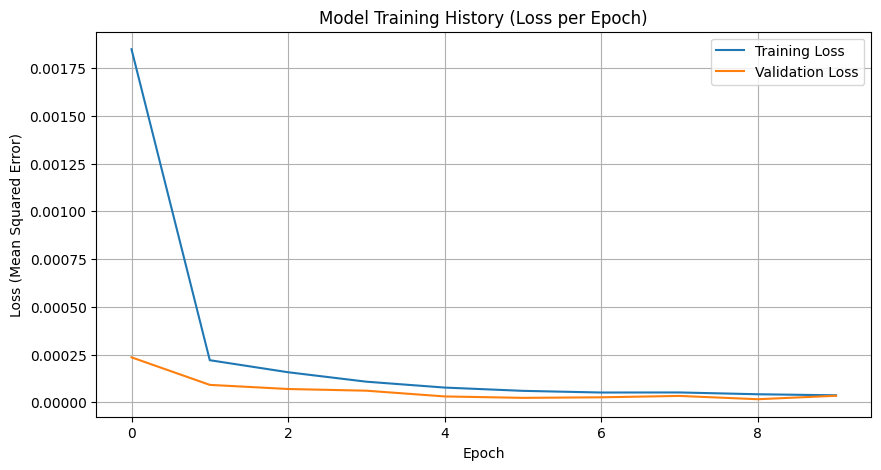

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History (Loss per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

In [48]:
import joblib # Added for saving the scaler

model.save('lstm_weather_model.keras')
joblib.dump(scaler, 'weather_scaler.joblib')

['weather_scaler.joblib']